In [1]:
# import libs, modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the option to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# Data-Source: "EU_all_current_shared_corrected.parquet" - Baseline added as a shortcut to My Drive (google-colab) start: 10.10.24
# Data-Source: "EU all_current_shared.parquet" - Baseline added as a shortcut to My Drive (google-colab) till:  09.10.24
# preprocessed DataSet by Andreas having all: countries and all years
file_path = "/content/drive/MyDrive/CO2/EU_all_current_shared_corrected.parquet"
df = pd.read_parquet(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442792 entries, 0 to 14442791
Data columns (total 41 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     Int64   
 1   Country                category
 2   VFN                    category
 3   Mp                     category
 4   Mh                     category
 5   Man                    category
 6   MMS                    category
 7   Tan                    category
 8   T                      category
 9   Va                     category
 10  Ve                     category
 11  Mk                     category
 12  Cn                     category
 13  Ct                     category
 14  Cr                     category
 15  r                      float32 
 16  m (kg)                 float32 
 17  Mt                     float32 
 18  Enedc (g/km)           float32 
 19  Ewltp (g/km)           float32 
 20  W (mm)                 float32 
 21  At1 (mm)               float3

In [3]:
# change some var types, since we have some NaNs in the r-column this must be done
# in two steps, missing values will be handeled later

# temporarily replace NaN with -1
df["r"] = df["r"].fillna(-1)

# change var-type - "special" int type which can have Nan-value: Int64
df = df.astype({ "r": "Int64", "#identical occurences": "Int64"})

# convert temp. Nan (-1) back to Nan -> ! "special" int type which can have Nan-value: Int64
df["r"] = df["r"].replace(to_replace = -1, value = np.nan).astype("Int64")

df.info()
# -> success "r" as Int64 having also NaNs
# -> success "#identical occurences" as Int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442792 entries, 0 to 14442791
Data columns (total 41 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     Int64   
 1   Country                category
 2   VFN                    category
 3   Mp                     category
 4   Mh                     category
 5   Man                    category
 6   MMS                    category
 7   Tan                    category
 8   T                      category
 9   Va                     category
 10  Ve                     category
 11  Mk                     category
 12  Cn                     category
 13  Ct                     category
 14  Cr                     category
 15  r                      Int64   
 16  m (kg)                 float32 
 17  Mt                     float32 
 18  Enedc (g/km)           float32 
 19  Ewltp (g/km)           float32 
 20  W (mm)                 float32 
 21  At1 (mm)               float3

In [4]:
# missing values per column
missing_values = df.isnull().sum()
print(missing_values)


ID                              0
Country                         0
VFN                       6022343
Mp                        1538457
Mh                              0
Man                        310768
MMS                       6048284
Tan                        490543
T                           62037
Va                         100484
Ve                         225223
Mk                          42908
Cn                          49370
Ct                          24710
Cr                        2826753
r                               4
m (kg)                      14075
Mt                        3802983
Enedc (g/km)              5466691
Ewltp (g/km)              3565598
W (mm)                    2252091
At1 (mm)                  2523206
At2 (mm)                  2738433
Ft                          24373
Fm                          85880
ec (cm3)                   613895
ep (KW)                   1401419
z (Wh/km)                13141566
IT                        9564034
Ernedc (g/km) 

In [68]:
# display first or sample rows/entries
#df.head(5)
df.sample(5)

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km),#identical occurences
11519956,80655746,DE,IP-HNP____MB6_1424-W0V-0,STELLANTIS,OPEL AUTOMOBILE,OPEL AUTOMOBILE GMBH,NaN,e4*2007/46*1194*15,P7 MONOCAB C,EA025DB12,BE1VADPH0A5,OPEL,CROSSLAND,M1,M1,1,1254.0,1375.0,NaN,130.0,2604.0,1491.0,1513.0,PETROL,M,1199.0,81.0,NaN,e2 28 29,NaN,2.12,NaN,NaN,P,2022,2022-01-06,5.8,NaN,NaN,NaN,1
7552591,8549852,DE,IP-MQB37AZ_A0_0825-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN-VW,e1*2001/116*0211*56,1T,DPCAAC,FM6FM6C90014BIS50VR21CAC,VOLKSWAGEN VW,TOURAN,M1,M1,1,1500.0,1699.0,131.0,155.0,2786.0,1534.0,1561.0,PETROL,M,1498.0,110.0,NaN,E1 17 19,2.6,NaN,NaN,NaN,P,2020,NaN,NaN,NaN,NaN,NaN,1
3712311,7610575,DE,NaN,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER (D),e1*2001/116*0457*40,204K,R283T0,CZAA152A,MERCEDES-BENZ,C 300,M1,M1,1,1610.0,1760.0,NaN,174.0,2840.0,1577.0,1536.0,PETROL,M,1991.0,190.0,NaN,E1 2,1.6,NaN,NaN,NaN,P,2018,NaN,NaN,NaN,NaN,NaN,1
2216812,47976,UK,NaN,GENERAL MOTORS,OPEL,ADAM OPEL AG,VAUXHALL,e4*2007/46*0957*03,D-A,DHXXFXX,B11PA5AYBB2B,VAUXHALL,VIVA SL,M1,NaN,1453,1037.0,NaN,104.0,NaN,2385.0,1410.0,1418.0,PETROL,M,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,2016,NaN,NaN,NaN,NaN,NaN,1
10135878,51167233,DE,IP-MQB37AS_A3_0817-WVW-1,VW-SAIC,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2001/116*0450*57,5N,ACDTSBX0,FD7FD7GC009N5N3TVR24BI1CSAMM1IS,"VOLKSWAGEN, VW",TIGUAN,M1,M1,1,1640.0,1785.0,NaN,153.0,2678.0,1569.0,1579.0,DIESEL,M,1968.0,110.0,NaN,E13 29 37,NaN,1.70,NaN,NaN,P,2021,2021-09-01,5.8,NaN,NaN,NaN,1


In [6]:
# number of unique values for all variables/columns in df: "EU_all_current_shared_corrected.parquet"
df_nunique = df.nunique()
display(df_nunique)
# ID: -> 11183264 of entries (expectation was/is same amount as entries: 14442792 [?])
# Andreas-Feedback: ID is only unique per year from the source: CO2 EU datsets...


,0
ID,11183264
Country,30
VFN,29048
Mp,46
Mh,261
Man,477
MMS,11561
Tan,49909
T,26611
Va,72533


Countries -EU- registering vehicles:  30
Years     -EU- registering vehicles:  2010-2023



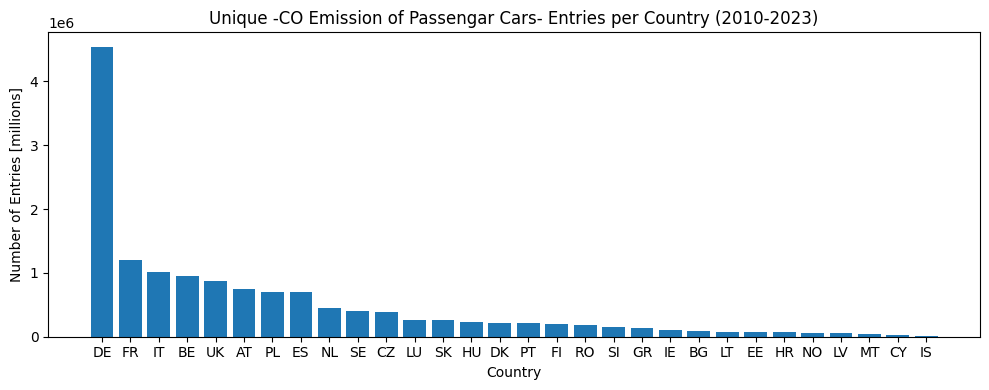

In [7]:
#display amount of countries
print("Countries -EU- registering vehicles: ",df["Country"].nunique())

#display resgistration years coverage
year_min = str(df["year"].min())[0:4]
year_max = str(df["year"].max())[0:4]
print("Years     -EU- registering vehicles: ", year_min + "-" + year_max)
print()

# display/graph unique entries per country (w/o: #identical occurences)
entries_per_country = df["Country"].value_counts()
# print("Unique entries per country (w/o: # identical occurences): \n" + str(entries_per_country))

plt.figure(figsize=(10, 4))
plt.bar(entries_per_country.index, entries_per_country.values)
plt.xlabel("Country")
plt.ylabel("Number of Entries [millions]")
plt.title("Unique -CO Emission of Passengar Cars- Entries per Country (2010-2023)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show();


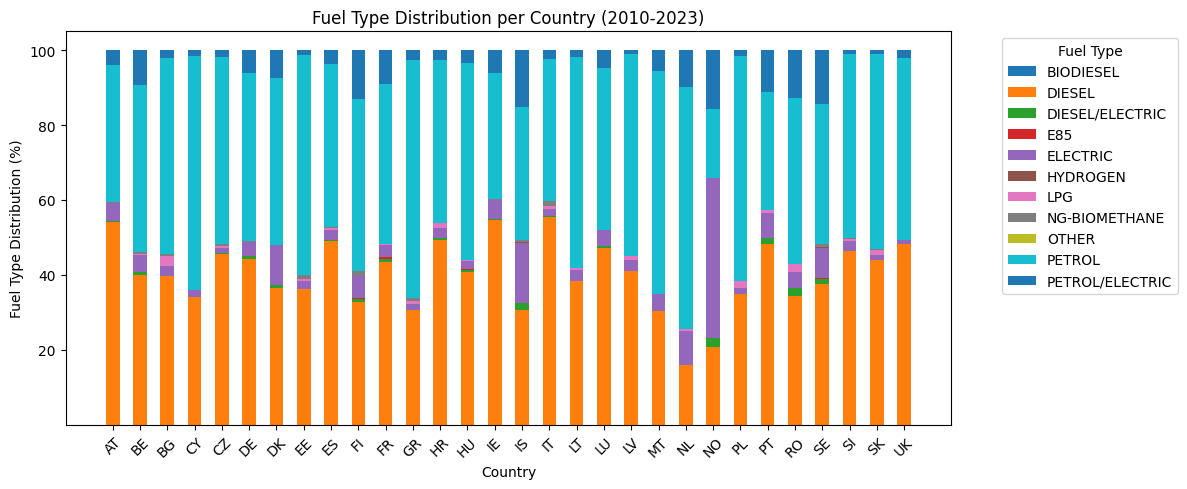

In [8]:
# Fuel Type distribution per country
# df_2023 = df.loc[df["year"] == 2023] # in case for detail view of year 2023

fuel_type_counts = df.groupby("Country", observed = True)["Ft"].value_counts(normalize = True) * 100
fuel_type_counts = fuel_type_counts.unstack()
# print(fuel_type_counts)

# barplot of fuel_type_counts
# plt.figure(figsize=(10, 6))
# fuel_type_counts.plot(kind="bar", stacked=True)
# plt.show();

# barplot with matplotlib
plt.figure(figsize=(12, 5))

# Setting up the bar positions and width
bar_width = 0.5
countries = fuel_type_counts.index
indices = np.arange(len(countries))

# Plotting each fuel type as a separate layer in the stacked bar
bottom_values = np.zeros(len(countries))  # Track the bottom of each stack
fuel_types = fuel_type_counts.columns

for fuel_type in fuel_types:
    plt.bar(indices, fuel_type_counts[fuel_type], bar_width, label=fuel_type, bottom=bottom_values)
    bottom_values += fuel_type_counts[fuel_type]  # Update the bottom for the next fuel type

# Adding labels, title, and legend
plt.xlabel("Country")
plt.ylabel("Fuel Type Distribution (%)")
plt.title("Fuel Type Distribution per Country (2010-2023)")
plt.xticks(indices, countries, rotation=45)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show();


In [9]:
# sub dataframe with electric fuel only
df_electric = df.loc[df["Ft"].isin(["ELECTRIC"])]
df_electric.head()

# distribution of df_electric - Ewltp g(km)
display(df_electric["Ewltp (g/km)"].value_counts())
# -> 0.0 : 522094 (electric cars do not have CO2 emissions)
# -> 1.0 :      1 (wrong entry)

# delete not more used sub-dataframe to free RAM
del df_electric

,count
Ewltp (g/km),
0.0,522094
117.0,1


In [10]:
# Assumption:
# Same cars (with same technical characteristics) are registered in different countries overlaping years
# -> one country enough, two years are enough
# ! took 30 sek. and mem. usage 9.5/12.7GB !

# Define the columns to drop
columns_to_drop = ["Country", "ID", "year", "Status", "Date of registration", "ech", "RLFI", "#identical occurences"]

# Drop the specified columns
df_reduced = df.drop(columns = columns_to_drop)

# Find duplicates in the dataset without the dropped columns
duplicates = df_reduced[df_reduced.duplicated(keep=False)]

# Count unique occurrences of these duplicates
num_duplicate_vehicles = duplicates.shape[0]

print("Number of vehicles that have duplicate entries accross:\n countries, years ", num_duplicate_vehicles)
# -> 827471

# Total number of entries in the dataset
total_entries = df.shape[0]

# Calculate the percentage of duplicate entries
duplicate_percentage = (num_duplicate_vehicles / total_entries) * 100

print("Percentage: ", round(duplicate_percentage,2))
# -> 5.73%

# liberate ram for the not more used df_reduced
del df_reduced
del duplicates

Number of vehicles that have duplicate entries accross:
 countries, years  827471
Percentage:  5.73


In [11]:
# Since the goal is to predict the CO2 emissions by technical characteristics of internal combustion engines
# (not electric, not hybrid) and the CO2 emissions by EU regulations have been droping since 2010...
# the following entries will be - KEPT -  the others dropped:

# Years: 2023-2022;
# keeping the last two years (2023 and 2022) and droping 2010-2021 which are for historical/trend analysis.
#
# Country: France
# For being the second most big EU car market (registration counts) and for the possibility to merge this
# subset with the ADEME car-labbeling dataset from the French gouverment
#
# Ft (Fuel Type): PETROL, DIESEL, LPG, NG-BIOMETHANE, BIODIESEL, E85
# Electric, hbrid (fuel electric), hydrogen and others fuels will be droped to focus on the int. combustion

# z (Wh/km): none -> drop column
# This specific electric energy consumption will be droped since only interestic for electric, hybrid cars.

# Electric range (km): none -> drop column
# Electric range only relevant for electric, hybrid cars which are non-internal-combusting

# Status: none -> drop column
# The two categories P: Provisional (for the year 2022) and F: Final (for all other year) will be handled
# both as final, so it possible that after QA-checking the dataset for 2023 (P -> F) some values may change.

# ech (Character corresponding to the provisions used for the type-approval): none -> drop (?)
# Will be checked after first cleaning/drop-off [ ]

# RLFI (Roadload [Matrix] families identifier): none -> drop (?)
# # Will be checked after first cleaning/drop-off [ ]


In [12]:
# unique fuel types for internal combustion engines
print("Unique fuel types: \n" + str(df["Ft"].value_counts()))

Unique fuel types: 
Ft
PETROL             6563371
DIESEL             6282061
PETROL/ELECTRIC     837545
ELECTRIC            540712
DIESEL/ELECTRIC      80397
LPG                  55900
NG-BIOMETHANE        46859
E85                  11157
HYDROGEN               314
BIODIESEL               94
OTHER                    9
Name: count, dtype: int64


In [13]:
# filter the DataFrame to keep only rows with specified fuel types
# create list of fuels for internal combustion only
fuel_int_combustion = ["PETROL", "DIESEL", "LPG", "NG-BIOMETHANE", "BIODIESEL", "E85"]

# filter the DataFrame to keep only rows with specified fuel types
df_int_combustion = df[df["Ft"].isin(fuel_int_combustion)]

# ----
# filter the Dataframe to keep only rows within the years 2022, 2023
df_int_combustion = df_int_combustion[df_int_combustion["year"].isin([2022, 2023])]

# ----
# filter the Dataframe to keep only rows within the country France (FR)
df_int_combustion = df_int_combustion[df_int_combustion["Country"] == "FR"]

#-----
# filter the Dataframe droping cols: ["z (Wh/km)", "Electric range (km)", "Status", "ech", "RLFI", "Date of registration", "#identical occurences", "r"]
df_int_combustion = df_int_combustion.drop(columns=["z (Wh/km)", "Electric range (km)", "Status", "ech", "RLFI", "Date of registration", "#identical occurences", "r"], axis = 1)
# display(df_int_combustion.info()) # -> some cols are empty

#----
# filter the Dataframe droping empty cols: ["MMS", "Enedc (g/km)", "Ernedc (g/km)", "De", "Vf" ]
df_int_combustion = df_int_combustion.drop(columns=["MMS", "Enedc (g/km)", "Ernedc (g/km)", "De", "Vf"], axis = 1)
display(df_int_combustion.info())

# Apply remove_unused_categories() to all categorical columns in the DataFrame
df_int_combustion = df_int_combustion.apply(
    lambda col: col.cat.remove_unused_categories() if col.dtype.name == "category" else col
)
display(df_int_combustion.head())


<class 'pandas.core.frame.DataFrame'>
Index: 218035 entries, 10828014 to 13929657
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ID                 218035 non-null  Int64   
 1   Country            218035 non-null  category
 2   VFN                218035 non-null  category
 3   Mp                 213285 non-null  category
 4   Mh                 218035 non-null  category
 5   Man                218035 non-null  category
 6   Tan                218035 non-null  category
 7   T                  218035 non-null  category
 8   Va                 218035 non-null  category
 9   Ve                 218034 non-null  category
 10  Mk                 218035 non-null  category
 11  Cn                 218035 non-null  category
 12  Ct                 218035 non-null  category
 13  Cr                 218035 non-null  category
 14  m (kg)             218035 non-null  float32 
 15  Mt                 218035 non-

None

,ID,Country,VFN,Mp,Mh,Man,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),IT,Erwltp (g/km),year,Fuel consumption
10828014,77799341,FR,IP-MQB37SZ_A0_0555-VSS-1,VOLKSWAGEN,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1A18AAA8M16,SEAT,SEAT ATECA,M1,M1,1514.0,1642.0,131.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.0
10828015,77799592,FR,IP-MQB37SZ_A0_0555-VSS-1,VOLKSWAGEN,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1A18AAA8M16,SEAT,SEAT ATECA,M1,M1,1514.0,1629.0,131.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.0
10828016,77799595,FR,IP-MQB37SZ_A0_0555-VSS-1,VOLKSWAGEN,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1A18AAA8M16,SEAT,SEAT ATECA,M1,M1,1514.0,1649.0,131.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.0
10828017,77799849,FR,IP-MQB37SZ_A0_0555-VSS-1,VOLKSWAGEN,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1C18AAA8M16,SEAT,SEAT ATECA,M1,M1,1514.0,1618.0,136.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.2
10828501,77579068,FR,IP-HNS____MB6E242A-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,e2*2007/46*0628*17,F,P,HNSL-B11E00,PEUGEOT,308,M1,M1,1333.0,1453.0,126.0,2680.0,1560.0,1555.0,PETROL,M,1199.0,96.0,NaN,NaN,2022,5.6


In [14]:
# number of unique values for all variables/columns
display(df_int_combustion.nunique())


,0
ID,218035
Country,1
VFN,2294
Mp,14
Mh,67
Man,67
Tan,2150
T,356
Va,1640
Ve,8399


In [15]:
# Ct/Cr value_counts of Ct: Category of the vehicle type approved and Cr: Category of the vehicle registered
print("Unique values of Ct: \n" + str(df_int_combustion["Ct"].value_counts()))
print()
print("Unique values of Cr: \n" + str(df_int_combustion["Cr"].value_counts()))
# Ct -> M1:  210506, M1G: 7529
# Cr -> M1:  210506, M1G: 7529
# both columns now contain the same information, so:
# -> Cr (Category of the vehicle regitered) will be kept
# -> Ct (Category of the vehicle type approved) will be droped

# Meaning of the categories (source: ChatGPT!)
# M Categories: Passenger vehicles.
#   M1: Standard passenger cars.
#   M1G: Off-road passenger vehicles.
#   M2: Minibuses with more than eight seats.
# N Categories: Goods vehicles (commercial).
#   N1: Light commercial vehicles (≤ 3.5 tons).
#   N1G: Off-road light commercial vehicles.
#   N2: Medium trucks (3.5 to 12 tons).
#   N2G: Off-road medium trucks.
#   N3: Heavy trucks (> 12 tons).
#   N3G: Off-road heavy trucks.


Unique values of Ct: 
Ct
M1     210506
M1G      7529
Name: count, dtype: int64

Unique values of Cr: 
Cr
M1     210506
M1G      7529
Name: count, dtype: int64


In [16]:
# Ct droping
df_int_combustion = df_int_combustion.drop(columns=["Ct"], axis = 1)


In [17]:
# T (Type) value_counts Top 10
df_int_combustion["T"].value_counts().head(10)
# -> maybe to be droped later on [ ]

,count
T,
U,9147
F,7814
M,6979
F3,6565
F2B,6046
F1H,6034
GY,5084
B8,5018
CD,4991


In [18]:
# pairplot of all numerical vars
# takes a lot of time -> out-commented
# sns.pairplot(df_int_combustion)
# plt.show();

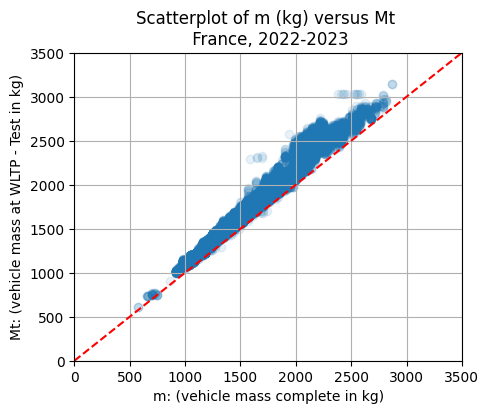

In [69]:
# m (kg) / Mt -> Mass in running order Completed/complete vehicle / WLTP test mass

# scatterplot of "m (kg)" versus Mt
plt.figure(figsize=(5, 4))
plt.scatter(df_int_combustion["m (kg)"], df_int_combustion["Mt"], alpha = 0.1)
plt.plot([0, 3500], [0, 3500], color="red", linestyle="--", linewidth=1.5)
plt.title("Scatterplot of m (kg) versus Mt \n France, 2022-2023")
plt.xlabel("m: (vehicle mass complete in kg)")
plt.ylabel("Mt: (vehicle mass at WLTP - Test in kg)")
plt.xlim(0, 3500)
plt.ylim(0, 3500)
plt.grid(True)
plt.show();

# Mt (WLTP) always higher ~ 10% -> "m (kg)" maybe to be droped [ ]

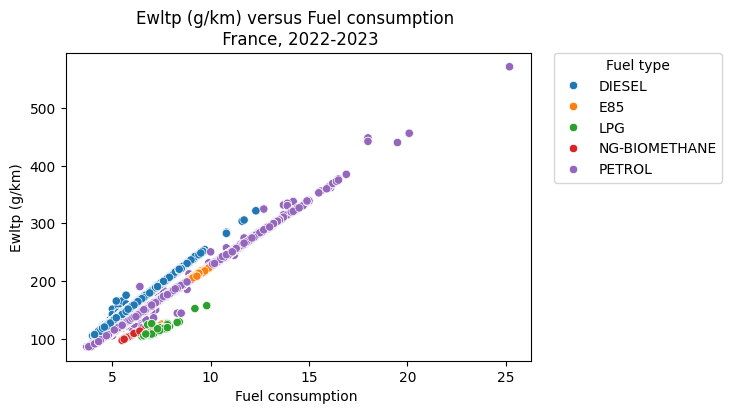

In [70]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# print(df_int_combustion.columns)

# "Ewltp (g/km) versus "Fuel consumption" , hue = Ft (Fuel type)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Fuel consumption ", y="Ewltp (g/km)", hue = "Ft")
plt.legend(title = "Fuel type", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Ewltp (g/km) versus Fuel consumption \n France, 2022-2023")
plt.show();

# yuhuu, hole in one...
# we can see how the different line paths correspond to the different fuel types
# -> Ft as to be included in later ML-Model [ ]


In [21]:
# # # # #
#
# Subtask: Project-Meeting: 09.10.24
#
# # # # #

# Take the dataset: EU all_current_shared.parquet and make a
# scatter-plot "Ewltp (g/km)" versus "Fuel consumption"
# with only "Petrol" as Ft (Fuel type)
# only_petrol_df = df.loc[(df["Ft"] == "PETROL") & (df["Ewltp (g/km)"] > 0)]
# display(only_petrol_df.head())

# plt.figure(figsize=(8, 4))
# sns.scatterplot(data= only_petrol_df, x= "Fuel consumption ", y= "Ewltp (g/km)", hue= "year", palette= "Spectral", alpha = 0.6)
# plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
# plt.title("Ewltp (g/km) versus Fuel consumption (Petrol)")
# plt.show();
#
#
# # # # #

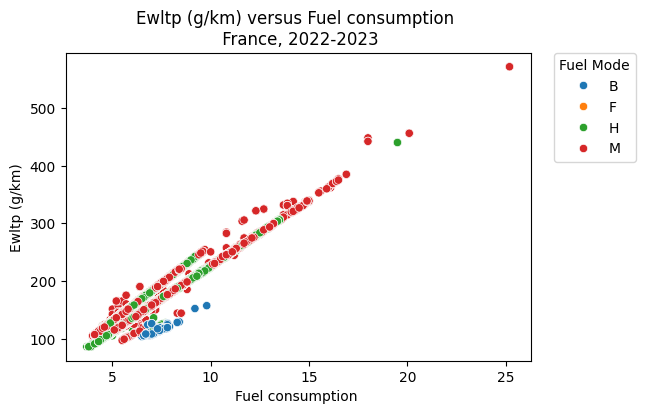

In [71]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "Fuel consumption" , hue = Fm (Fuel mode)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Fuel consumption ", y="Ewltp (g/km)", hue = "Fm")
plt.legend(title="Fuel Mode", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Ewltp (g/km) versus Fuel consumption \n France, 2022-2023")
plt.show();


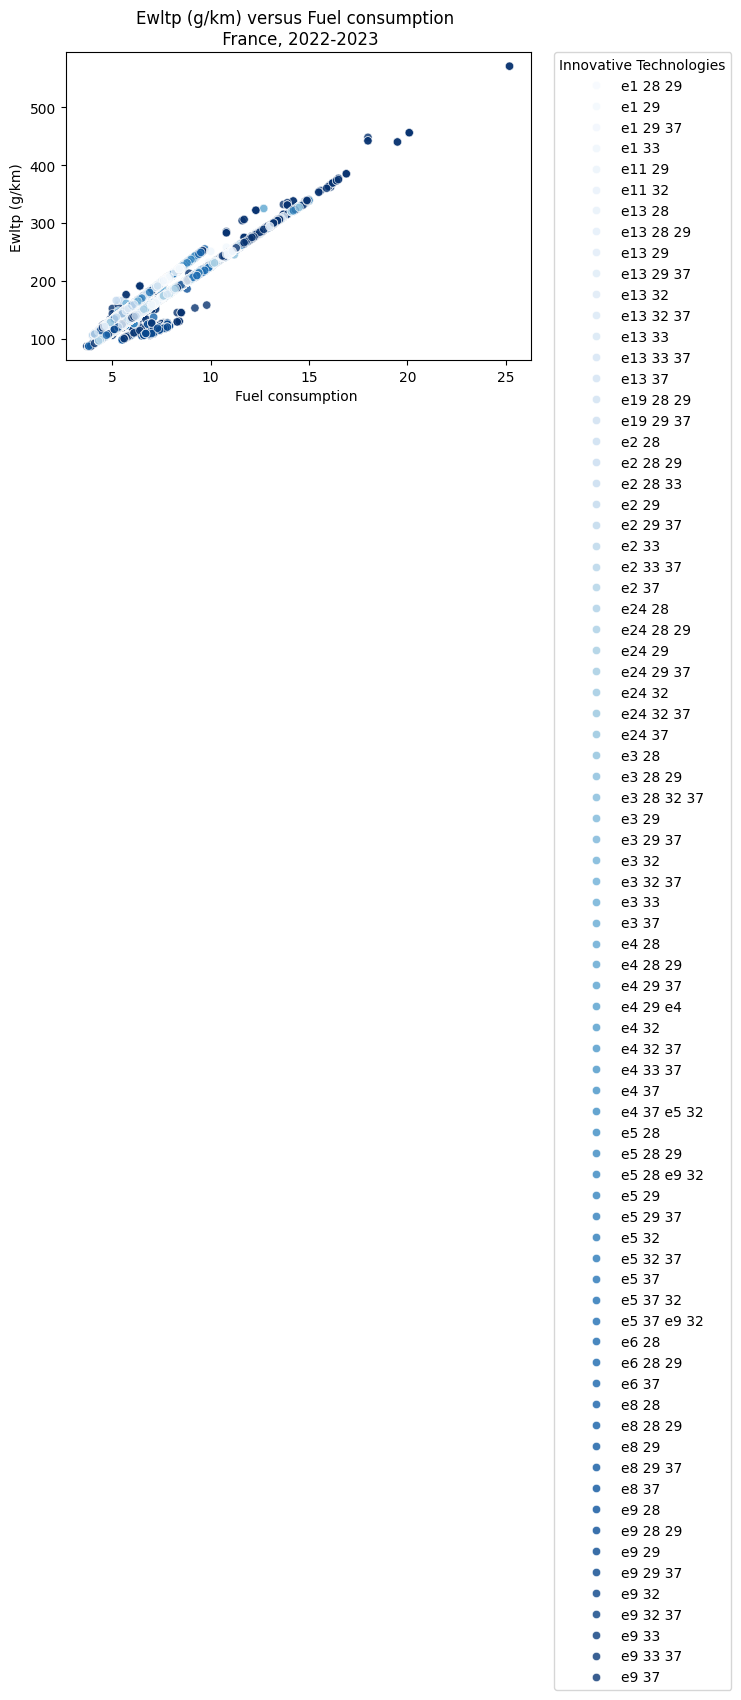

In [72]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "Fuel consumption" , hue = Mk
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Fuel consumption ", y="Ewltp (g/km)", hue = "IT", palette="Blues", alpha = 0.8)
plt.legend(title = "Innovative Technologies", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Ewltp (g/km) versus Fuel consumption \n France, 2022-2023")
plt.show();

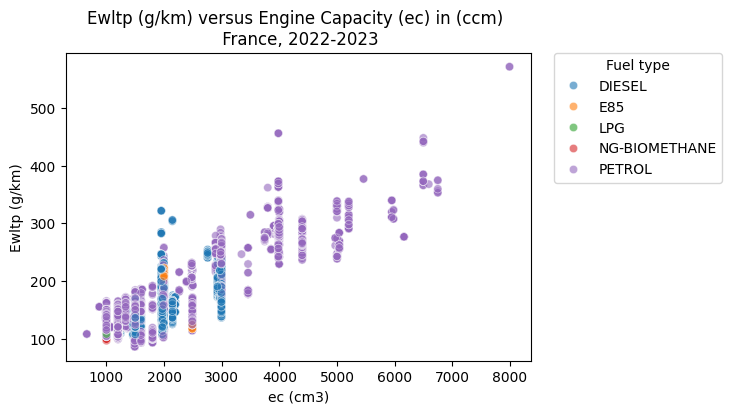

In [73]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "ec (cm3)" , hue = Fuel types
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="ec (cm3)", y="Ewltp (g/km)", hue = "Ft", alpha = 0.6)
plt.legend(title = "Fuel type", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Ewltp (g/km) versus Engine Capacity (ec) in (ccm) \n France, 2022-2023")
plt.show();

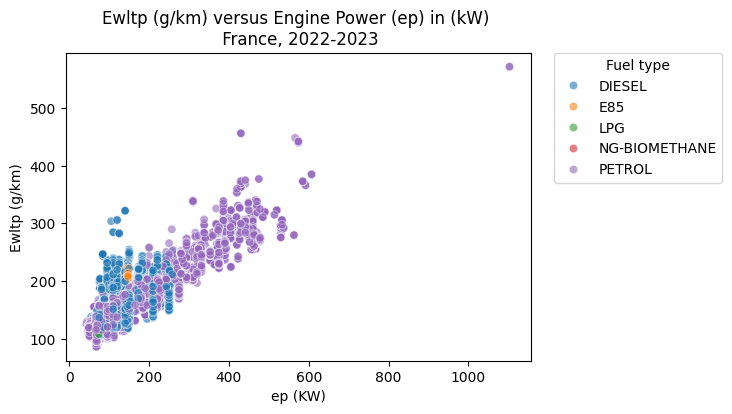

In [74]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "ep (KW)" , hue = Fuel types
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="ep (KW)", y="Ewltp (g/km)", hue = "Ft", alpha = 0.6)
plt.legend(title = "Fuel type", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Ewltp (g/km) versus Engine Power (ep) in (kW) \n France, 2022-2023")
plt.show();

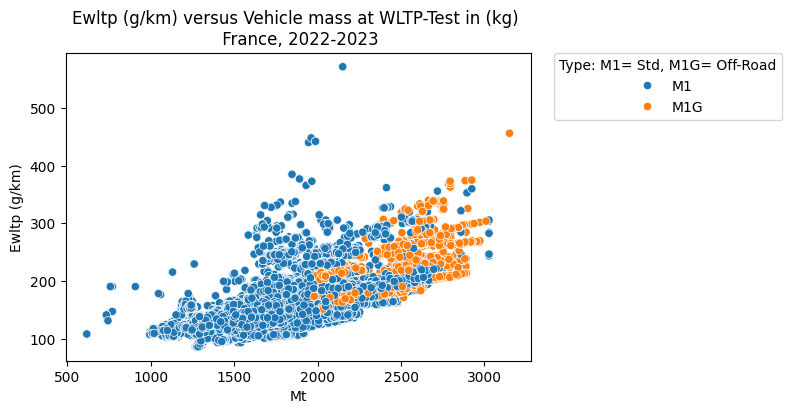

In [75]:
# Ewltp (g/km) -> (target VAR) pairplots with hue of some cat-vars : )

# "Ewltp (g/km) versus "Mt" , hue = Fuel types
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="Ewltp (g/km)", hue = "Cr")
plt.legend(title = "Type: M1= Std, M1G= Off-Road", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Ewltp (g/km) versus Vehicle mass at WLTP-Test in (kg) \n France, 2022-2023")
plt.show();

# ->
# Heavier/Bigger vehicles (Off-Road = M1G) tend to have a higher CO2 emissions
# There are some excemptions but it is assumed that this belog to sports-cars

In [27]:
# Further Preporcoessing after visualizing some vars:
#  Drop columns/vars
#  Drop unused categorie
#  Missing Value handling
#  Outlier handling
#  Feature Engineering / Dim-reduction

In [28]:
# Droping unused categories which appear in the sub-dataframe

# Apply remove_unused_categories() to all categorical columns in the subset
df_int_combustion = df_int_combustion.apply(lambda col: col.cat.remove_unused_categories() if col.dtype.name == "category" else col)

In [29]:
# Missing value handling

# missing value per column
df_int_combustion.isna().sum()


,0
ID,0
Country,0
VFN,0
Mp,4750
Mh,0
Man,0
Tan,0
T,0
Va,0
Ve,1


In [30]:
# Missing value handling - continued -

# Ve has one single NaN value so will drop that row
df_int_combustion = df_int_combustion.dropna(axis = 0, subset = ["Ve"])
df_int_combustion.isna().sum()

# Mp = Manufacturing pooling is a Pool of manufactuers associated  togehther to reach CO2 emission targets
# Has a "bare" startegic meaning -> drop
df_int_combustion = df_int_combustion.drop("Mp", axis = 1)
display(df_int_combustion.isna().mean() * 100)
df_int_combustion.sample(10)

,0
ID,0.000000
Country,0.000000
VFN,0.000000
Mh,0.000000
Man,0.000000
Tan,0.000000
T,0.000000
Va,0.000000
Ve,0.000000
Mk,0.000000


,ID,Country,VFN,Mh,Man,Tan,T,Va,Ve,Mk,Cn,Cr,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),IT,Erwltp (g/km),year,Fuel consumption
12288231,77911999,FR,IP-MQB37AZ_B0_0812-WAU-1,AUDI AG,AUDI AG,e1*2007/46*1900*26,F3,SDFYAF1,FD7FD7GC008RT61C204BIBHA4EM10B2,AUDI,Q3 SPORTBACK,M1,1605.0,1732.0,158.0,2678.0,1582.0,1583.0,PETROL,H,1498.0,110.0,NaN,NaN,2022,7.0
12549191,78089104,FR,IP-MQB37AS_A3_0817-WVW-1,VOLKSWAGEN,VOLKSWAGEN AG,e1*2001/116*0450*64,5N,ACDTSBX0,FD7FD7GC009L7N5NVR24BI1ASANM1ISO,VOLKSWAGEN,TIGUAN,M1,1739.0,1939.0,150.0,2788.0,1575.0,1565.0,DIESEL,M,1968.0,110.0,e13 29 37,1.66,2022,5.7
12724165,122261444,FR,IP-JAA1MTPDK0A_001-VF1-1,RENAULT,RENAULT SAS,e2*2007/46*0676*19,RJA,BE2,MTXUA7KA5200,RENAULT,CLIO,M1,1190.0,1292.0,133.0,NaN,NaN,NaN,PETROL,M,999.0,67.0,e9 29 37,1.86,2023,5.9
12291155,77926129,FR,IP-MLB49_Z_B0_0684-WAU-1,AUDI AG,AUDI AG,e1*2001/116*0430*85,B8,S2DTNAF1,FD7FD7CK006RT171E19S54BIBEM10D1,AUDI,A5 SPORTBACK,M1,1595.0,1759.0,138.0,2830.0,1577.0,1558.0,DIESEL,H,1968.0,120.0,NaN,NaN,2022,5.3
12645784,121163729,FR,IP-HMH____MA5_5310-VR3-0,STELLANTIS AUTO,STELLANTIS AUTO SAS,e2*2007/46*0639*20,U,P,HMHD-J1K400,PEUGEOT,208,M1,1055.0,1160.0,120.0,NaN,NaN,NaN,PETROL,M,1199.0,55.0,e2 29,1.24,2023,5.3
12545031,78083059,FR,IP-MQB37AZ_A2_0115-WVN-1,VOLKSWAGEN,VOLKSWAGEN AG,e13*2018/858*00002*08,SK,AFDTRCX0,L245FM6FM6C9008N2N4BI1AA50NC,VOLKSWAGEN,CADDY,M1,1695.0,1902.0,132.0,2970.0,1568.0,1603.0,DIESEL,M,1968.0,90.0,e1 29,1.02,2022,5.0
12548676,78061039,FR,IP-0000387-WBA-1,BMW AG,BAYERISCHE MOTOREN WERKE AG,e1*2007/46*1682*12,FMX,21BR,IAW500BT,MINI,COUNTRYMAN COOPER,M1,1505.0,1691.0,150.0,2670.0,1585.0,1587.0,PETROL,M,1499.0,100.0,e24 28 29,2.10,2022,6.6
13754353,122667558,FR,IP-0001015-WBA-1,BMW AG,BAYERISCHE MOTOREN WERKE AG,e1*2007/46*1682*15,FMX,81BR,IAW500B0,MINI,COUNTRYMAN COOPER S ALL4,M1,1645.0,1799.0,163.0,NaN,NaN,NaN,PETROL,M,1998.0,131.0,e24 29 37,2.16,2023,7.2
12717778,122172359,FR,IP-0000544-WBA-1,BMW AG,BAYERISCHE MOTOREN WERKE AG,e1*2007/46*1824*14,F2X,YH11,IHW500LT,BMW,X2 SDRIVE18I,M1,1485.0,1636.0,144.0,NaN,NaN,NaN,PETROL,M,1499.0,100.0,e24 28 29,2.10,2023,6.3
12682478,121328937,FR,IP-MQB37AS_B0_0817-TMB-1,SKODA,SKODA AUTO AS,e8*2007/46*0249*28,NS,ACDTSBX0,VFD7FD7GC0094BI5NS7N1B0B,SKODA,KODIAQ,M1,1750.0,1985.0,149.0,NaN,NaN,NaN,DIESEL,M,1968.0,110.0,NaN,NaN,2023,5.7


In [31]:
# How to get Missing values: At1, At2, W from 2022 to 2023
#
# At1: Axle width steering axle (mm)
# At2: Axle width other axle (mm)
# W: Wheel Base (mm)
#
# Assumption:
# Same Mk: Make (Mercedes Benz) with same Cn: Comercial name (GLS 400 D), are about the same size -> At1, At2, W
# Assign this values as (Medians of groups: Mk, Cn) to the missing values (NaN) from 2022 to those same groups of 2023

# Step 1: Group the data by "Mk" and "Cn" and calculate the median for At1, At2, W
grouped_medians = df_int_combustion.groupby(["Mk", "Cn"], observed=True)[["At1 (mm)", "At2 (mm)", "W (mm)"]].median().reset_index()

# Step 2: Create a dictionary from the grouped data for quick lookup
median_lookup = grouped_medians.set_index(["Mk", "Cn"]).to_dict(orient="index")

# Step 3: Iterate through the DataFrame and fill missing values in 2023
for idx, row in df_int_combustion.iterrows():
    # Check if the row is from 2023 and has missing values in At1, At2, W
    if row["year"] == 2023 and (pd.isna(row["At1 (mm)"]) or pd.isna(row["At2 (mm)"]) or pd.isna(row["W (mm)"])):
        # Get the Mk and Cn for the row
        mk_value = row["Mk"]
        cn_value = row["Cn"]

        # Look up the median values from 2022
        if (mk_value, cn_value) in median_lookup:
            if pd.isna(row["At1 (mm)"]):
                df_int_combustion.at[idx, "At1 (mm)"] = median_lookup[(mk_value, cn_value)]["At1 (mm)"]
            if pd.isna(row["At2 (mm)"]):
                df_int_combustion.at[idx, "At2 (mm)"] = median_lookup[(mk_value, cn_value)]["At2 (mm)"]
            if pd.isna(row["W (mm)"]):
                df_int_combustion.at[idx, "W (mm)"] = median_lookup[(mk_value, cn_value)]["W (mm)"]

display(df_int_combustion.head())
display(df_int_combustion.info())


,ID,Country,VFN,Mh,Man,Tan,T,Va,Ve,Mk,Cn,Cr,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),IT,Erwltp (g/km),year,Fuel consumption
10828014,77799341,FR,IP-MQB37SZ_A0_0555-VSS-1,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1A18AAA8M16,SEAT,SEAT ATECA,M1,1514.0,1642.0,131.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.0
10828015,77799592,FR,IP-MQB37SZ_A0_0555-VSS-1,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1A18AAA8M16,SEAT,SEAT ATECA,M1,1514.0,1629.0,131.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.0
10828016,77799595,FR,IP-MQB37SZ_A0_0555-VSS-1,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1A18AAA8M16,SEAT,SEAT ATECA,M1,1514.0,1649.0,131.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.0
10828017,77799849,FR,IP-MQB37SZ_A0_0555-VSS-1,SEAT,SEAT SA,e9*2007/46*6394*34,5FP,SXDTTCX0,FD7SFD7GC0044BIVL1C18AAA8M16,SEAT,SEAT ATECA,M1,1514.0,1618.0,136.0,2621.0,1575.0,1549.0,DIESEL,M,1968.0,110.0,NaN,NaN,2022,5.2
10828501,77579068,FR,IP-HNS____MB6E242A-VR3-0,PSA,PSA AUTOMOBILES SA,e2*2007/46*0628*17,F,P,HNSL-B11E00,PEUGEOT,308,M1,1333.0,1453.0,126.0,2680.0,1560.0,1555.0,PETROL,M,1199.0,96.0,NaN,NaN,2022,5.6


<class 'pandas.core.frame.DataFrame'>
Index: 218034 entries, 10828014 to 13929657
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ID                 218034 non-null  Int64   
 1   Country            218034 non-null  category
 2   VFN                218034 non-null  category
 3   Mh                 218034 non-null  category
 4   Man                218034 non-null  category
 5   Tan                218034 non-null  category
 6   T                  218034 non-null  category
 7   Va                 218034 non-null  category
 8   Ve                 218034 non-null  category
 9   Mk                 218034 non-null  category
 10  Cn                 218034 non-null  category
 11  Cr                 218034 non-null  category
 12  m (kg)             218034 non-null  float32 
 13  Mt                 218034 non-null  float32 
 14  Ewltp (g/km)       218034 non-null  float32 
 15  W (mm)             216628 non-

None

In [32]:
# check again where the At1, At2, W values are missing: year 2022, 2023
df_int_combustion.loc[df_int_combustion["year"] == 2022].isna().mean() * 100
df_int_combustion.loc[df_int_combustion["year"] == 2023].isna().mean() * 100

# OK still some entries (1406) for At1, At2, W missing onyl in 2023
# At1, At2, W = 1.4% for the year 2023 (no matching found)
# -> drop those entries

# drop entries/rows where At1, At2, W are NaN
df_int_combustion = df_int_combustion.dropna(axis = 0, subset = ["At1 (mm)", "At2 (mm)", "W (mm)"])
df_int_combustion.isna().sum()

# -> Still some missing values in IT (23992) and Erwltp (23995)


,0
ID,0
Country,0
VFN,0
Mh,0
Man,0
Tan,0
T,0
Va,0
Ve,0
Mk,0


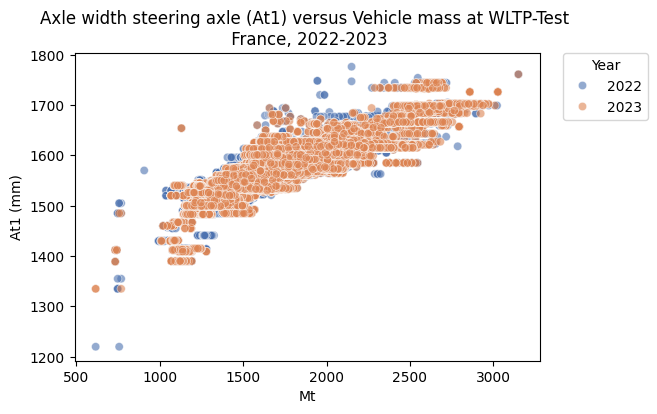

In [76]:
# Missing values - imputation visualization -

# let us visualize the imputed values for -> At1, At2, W...

# scatterplot of At1 versus Mt, hue = year
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="At1 (mm)", hue= "year", palette= "deep", alpha = 0.6)
plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Axle width steering axle (At1) versus Vehicle mass at WLTP-Test \n France, 2022-2023")
plt.show();

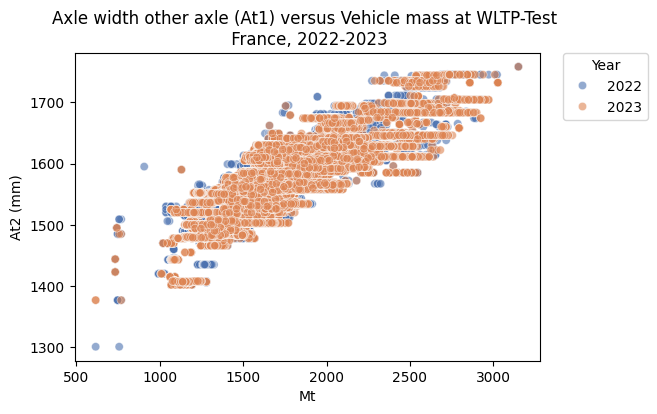

In [77]:
# Missing values - imputation visualization -

# let us visualize the imputed values for At1, -> At2, W...

# scatterplot of At2 versus Mt, hue = year
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="At2 (mm)", hue= "year", palette= "deep", alpha = 0.6)
plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Axle width other axle (At1) versus Vehicle mass at WLTP-Test \n France, 2022-2023")
plt.show();


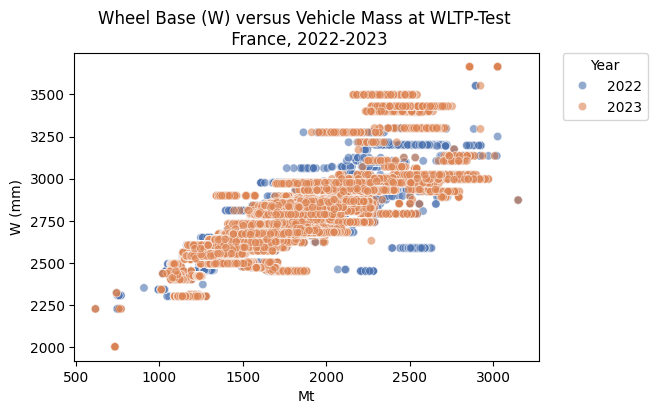

In [79]:
# Missing values - imputation visualization -
#
# let us visualize the imputed values for At1, At2, -> W...

# scatterplot of W versus Mt, hue = year using Pandas
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_int_combustion, x="Mt", y="W (mm)", hue= "year", palette= "deep", alpha = 0.6)
plt.legend(title = "Year", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.title("Wheel Base (W) versus Vehicle Mass at WLTP-Test \n France, 2022-2023")
plt.show();

In [36]:
# Missing value handling continued
#
# IT and Erwltp (g/km)
# -> ~ 11% NaNs (23992)

# if no IT Innovative Technology is installed, then also no CO2 reduction in the WLTP-Test
df_int_combustion.loc[(df_int_combustion["IT"].isna()) & (df_int_combustion["Erwltp (g/km)"].isna())].shape
# -> (23992, 26) -> assumption is correct

# replace NaN in IT with "_none_" and replace NaN in ErWltp with 0
df_int_combustion["IT"] = df_int_combustion["IT"].cat.add_categories("_none_")
df_int_combustion["IT"] = df_int_combustion["IT"].fillna("_none_")
df_int_combustion["Erwltp (g/km)"] = df_int_combustion["Erwltp (g/km)"].fillna(0)
display(df_int_combustion.isna().sum())
# -> no missing values  -> :)

,0
ID,0
Country,0
VFN,0
Mh,0
Man,0
Tan,0
T,0
Va,0
Ve,0
Mk,0


In [37]:
print("df_int_combustion here - shape: ", df_int_combustion.shape)

df_int_combustion here - shape:  (216628, 26)


In [38]:
# Outliers / Extrme Values ?

In [39]:
# Outliers / Extreme Values (num. vars)
#
# create subset with only (real) numerical variable
# drop "ID", "year", "m (kg)" -> we keep Mt (mass at WLTP Test) which always ~ 10% higher
df_int_combustion_num = df_int_combustion.drop(["ID", "year", "m (kg)"], axis =1)

# select only numerical vars./columns
df_int_combustion_num = df_int_combustion_num.select_dtypes(include=[np.number])


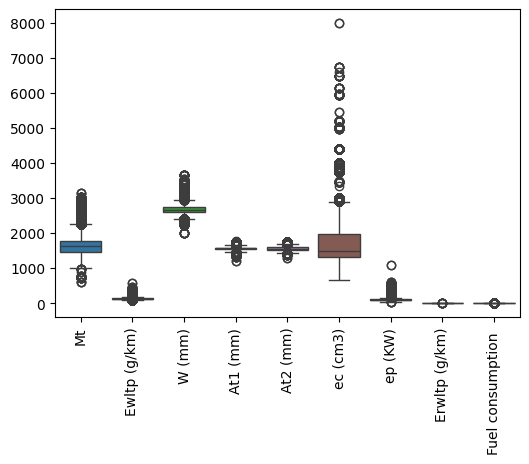

In [40]:
# Outliers / Extreme Values graphical representation I - Box-Plots -

# supress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# boxplot all numerical variables
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_int_combustion_num)
plt.xticks(rotation=90)
plt.show();

In [41]:
# Outliers / Extreme Values

# Checking potential outliers for Engine Capacity

# show entries for Top-10 engine capacity (ec) [ccm]
display(df_int_combustion.sort_values(by = "ec (cm3)", ascending = False).head(10))
# -> "outliers compared to the "bulk" of cars, but extreme values instead of outliers
# -> These are Bugatti, Rolls Royce, Lamborghini
# -> will be kept, not droped

,ID,Country,VFN,Mh,Man,Tan,T,Va,Ve,Mk,Cn,Cr,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),IT,Erwltp (g/km),year,Fuel consumption
10948950,77500033,FR,IP NON RENSEIGNE (0001),BUGATTI,BUGATTI AUTOMOBILES SAS,e1*KS07/46*0008*17,5B,DALAADX1CN,TAD7AD71C002,BUGATTI,CHIRON,M1,2070.0,2150.0,571.0,2711.0,1747.0,1670.0,PETROL,M,7993.0,1103.0,_none_,0.0,2022,25.200001
10948949,77500032,FR,IP NON RENSEIGNE,BUGATTI,BUGATTI AUTOMOBILES SAS,e1*KS07/46*0008*15,5B,DALAADX1CR,TAD7AD71C003,BUGATTI,CHIRON PUR SPORT,M1,2070.0,2150.0,571.0,2711.0,1776.0,1695.0,PETROL,M,7993.0,1103.0,_none_,0.0,2022,25.200001
12274873,76836667,FR,IP-0000006-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*KS18/858*00003*02,RRASF02,TD21,IAW50000,ROLLS ROYCE,GHOST,M1,2565.0,2718.0,356.0,3295.0,1674.0,1698.0,PETROL,M,6749.0,420.0,_none_,0.0,2022,15.600000
13424537,121647541,FR,IP-0000009-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*ks18/858*00003*03,RRASF02,TU21,IAW40000,ROLLS ROYCE,PHANTOM,M1,2755.0,2924.0,360.0,3552.0,1683.0,1674.0,PETROL,M,6749.0,420.0,_none_,0.0,2023,15.900000
12274874,76836668,FR,IP-0000002-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*KS18/858*00003*01,RRASF02,TU21,IAW40000,ROLLS ROYCE,PHANTOM,M1,2760.0,2896.0,354.0,3552.0,1683.0,1674.0,PETROL,M,6749.0,420.0,_none_,0.0,2022,15.500000
12274875,76836669,FR,IP-0000002-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*KS18/858*00003*00,RRASF02,TU21,IAW50000,ROLLS ROYCE,PHANTOM,M1,2760.0,2895.0,353.0,3552.0,1683.0,1674.0,PETROL,M,6749.0,420.0,_none_,0.0,2022,15.500000
12274876,76836670,FR,IP-0000007-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*KS18/858*00003*02,RRASF02,TV61,IAW50000,ROLLS ROYCE,CULLINAN BLACK BADGE,M1G,2785.0,2884.0,374.0,3295.0,1702.0,1674.0,PETROL,M,6749.0,441.0,_none_,0.0,2022,16.400000
13757870,122793669,FR,IP-0000007-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*ks18/858*00003*04,RRASF02,TV61,IAW40000,ROLLS ROYCE,CULLINAN BLACK BADGE,M1G,2785.0,2924.0,375.0,3295.0,1702.0,1674.0,PETROL,M,6749.0,441.0,_none_,0.0,2023,16.500000
12274877,76836671,FR,IP-0000004-SCA-1,ROLLS-ROYCE,ROLLS-ROYCE MOTOR CARS LTD,e1*2007/46*1989*04,GhostFamily,XZ81,IAW400B0,ROLLS ROYCE,DAWN,M1,2705.0,2786.0,368.0,3112.0,1618.0,1665.0,PETROL,M,6592.0,441.0,_none_,0.0,2022,16.200001
12253539,78266338,FR,IP-0020-ZHW-1,LAMBORGHINI,AUTOMOBILI LAMBORGHINI SPA,e3*KS07/46*0075*19,834,U,21ALC,LAMBORGHINI,AVENTADOR,M1,1790.0,1987.0,442.0,2700.0,1720.0,1680.0,PETROL,M,6498.0,574.0,_none_,0.0,2022,18.000000


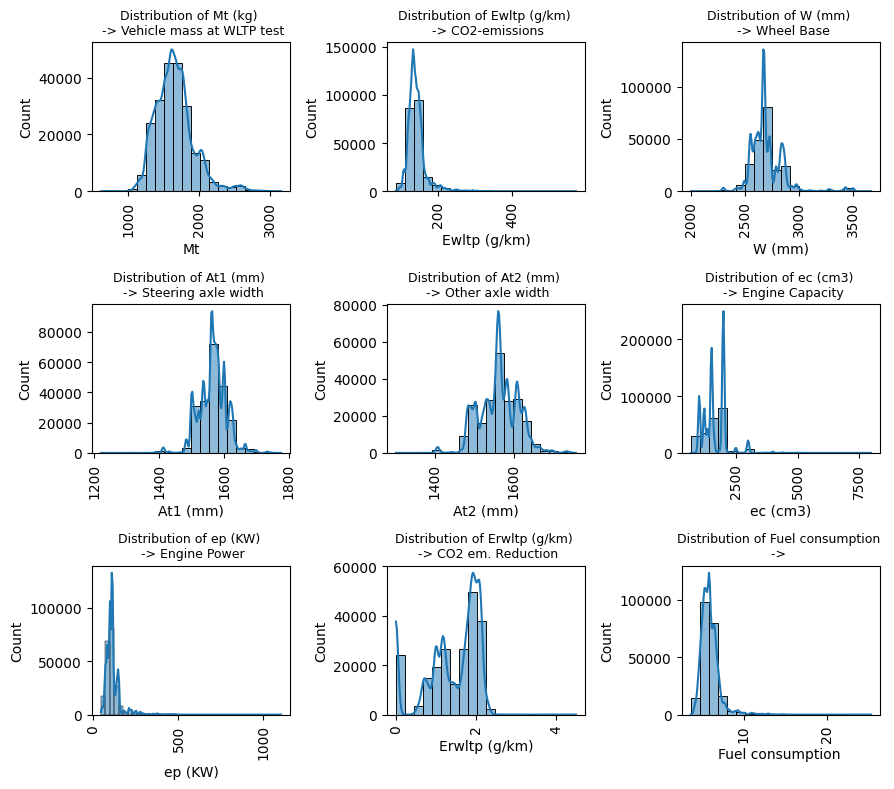

In [42]:
# Outliers / Extreme Values graphical representation II

# plot all numerical variables
plt.figure(figsize=(9, 8))

# subplot 1
plt.subplot(3, 3, 1)
sns.histplot(data=df_int_combustion_num["Mt"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Mt (kg) \n -> Vehicle mass at WLTP test", fontsize = 9)

# subplot 2
plt.subplot(3, 3, 2)
sns.histplot(data=df_int_combustion_num["Ewltp (g/km)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Ewltp (g/km) \n -> CO2-emissions", fontsize = 9)

# subplot 3
plt.subplot(3, 3, 3)
sns.histplot(data=df_int_combustion_num["W (mm)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of W (mm) \n -> Wheel Base", fontsize = 9)

# subplot 4
plt.subplot(3, 3, 4)
sns.histplot(data=df_int_combustion_num["At1 (mm)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of At1 (mm) \n -> Steering axle width", fontsize = 9)

# subplot 5
plt.subplot(3, 3, 5)
sns.histplot(data=df_int_combustion_num["At2 (mm)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of At2 (mm) \n -> Other axle width", fontsize = 9)

# subplot 6
plt.subplot(3, 3, 6)
sns.histplot(data=df_int_combustion_num["ec (cm3)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of ec (cm3) \n -> Engine Capacity", fontsize = 9)

# subplot 7
plt.subplot(3, 3, 7)
sns.histplot(data=df_int_combustion_num["ep (KW)"], bins=40, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of ep (KW) \n -> Engine Power", fontsize = 9)

# subplot 8
plt.subplot(3, 3, 8)
sns.histplot(data=df_int_combustion_num["Erwltp (g/km)"], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Erwltp (g/km) \n -> CO2 em. Reduction", fontsize = 9)

# subplot 9
plt.subplot(3, 3, 9)
sns.histplot(data=df_int_combustion_num["Fuel consumption "], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title("Distribution of Fuel consumption \n ->  ", fontsize = 9)


# Adjust layout and show the plot
plt.tight_layout()
plt.show();

# Results:
# No outliers, but extreme values, will be kept for first regression models ...
# NaNs in Erwltp (g/km) were set to 0 which now shows an odd distribution

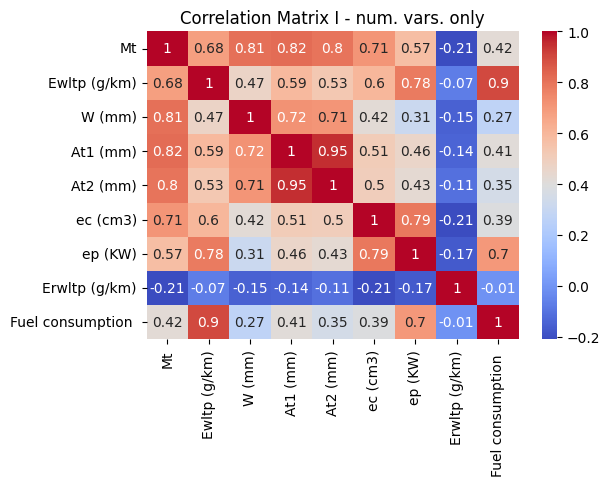

In [43]:
# create correlation matrix I
df_int_combustion_num_corr = round(df_int_combustion_num.corr(),2)

# draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_int_combustion_num_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix I - num. vars. only")
plt.show();

# Results:
# Top 3 correlation factors with Ewltp (g/km) are:
# Fuel consumption (l/100km): 0.90
# ep (KW): 0.78
# Mt (kg): 0.68
#
# Erwlt (g/km) which are the CO2 Emission reductions
# by using Innovative Technologies does not strongly correlate with any var
# but will be kept now.
#
# "Mt" the vehicle mass at WLTP Test conditions strongly correlates
# with A1t, A2t and W which are the Steering-/Other-Axle and Wheelbase dimensions in (mm)
# -> summarize this 3 Vars in one Wheel-Area (mm2) which would be an indicator
# -> of the vehicle size

94579

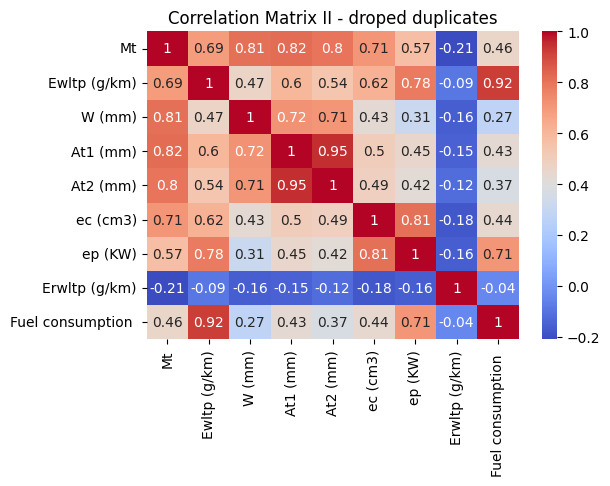

In [44]:
# still duplicates in the df_int_combustion_num ? pot. yes since columns were droped...
display(df_int_combustion_num.duplicated().sum())
# -> 94579

# drop duplicates just to see any effect on the corr matrix
df_int_combustion_num_dp = df_int_combustion_num.drop_duplicates()

# create correlation matrix
df_int_combustion_num_dp_corr = round(df_int_combustion_num_dp.corr(),2)

# draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_int_combustion_num_dp_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix II - droped duplicates")
plt.show();

# -> corr. matrix / heat_map slightly modified

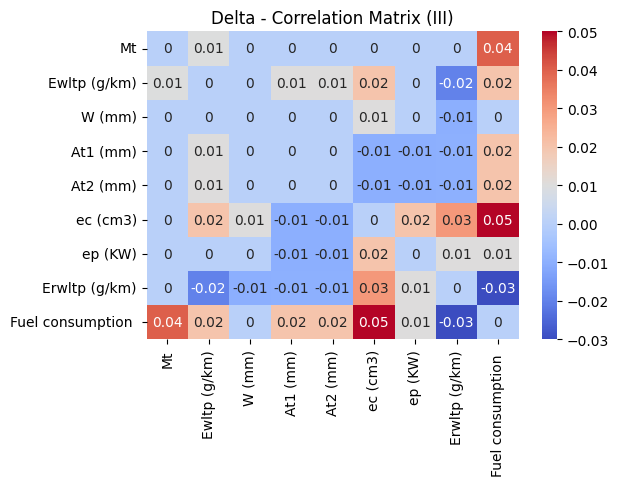

In [45]:
d_corr = df_int_combustion_num_dp_corr - df_int_combustion_num_corr
d_corr

# draw heatmap of d_corr
plt.figure(figsize=(6, 4))
sns.heatmap(d_corr, annot=True, cmap="coolwarm")
plt.title("Delta - Correlation Matrix (III)")
plt.show();

# not a big difference but a little bit ;)
# makes the cow not fat but nice to see the effect..
# will keep this in the backhand

In [46]:
# Feature Engineering / "Dimensionality Reduction"
#
# "Mt" the vehicle mass at WLTP Test conditions strongly correlates
# with A1t, A2t and W which are the Steering-/Other-Axle and Wheelbase dimensions in (mm)
# -> summarize this 3 Vars in one "WA (mm2) = Wheel-Area (m2) which would be an indicator
# -> of the vehicle size

# create a new column by taking the avg of At1 and At2 and multypliying this by W
df_int_combustion_num["WA (m2)"] = round(((df_int_combustion_num["At1 (mm)"] +
                                           df_int_combustion_num["At2 (mm)"]) / 2) *
                                           df_int_combustion_num["W (mm)"] / 1000000, 2)

# drop the old columns
df_int_combustion_num = df_int_combustion_num.drop(["At1 (mm)", "At2 (mm)", "W (mm)"], axis = 1)

# display the new df
df_int_combustion_num.head()


,Mt,Ewltp (g/km),ec (cm3),ep (KW),Erwltp (g/km),Fuel consumption,WA (m2)
10828014,1642.0,131.0,1968.0,110.0,0.0,5.0,4.09
10828015,1629.0,131.0,1968.0,110.0,0.0,5.0,4.09
10828016,1649.0,131.0,1968.0,110.0,0.0,5.0,4.09
10828017,1618.0,136.0,1968.0,110.0,0.0,5.2,4.09
10828501,1453.0,126.0,1199.0,96.0,0.0,5.6,4.17


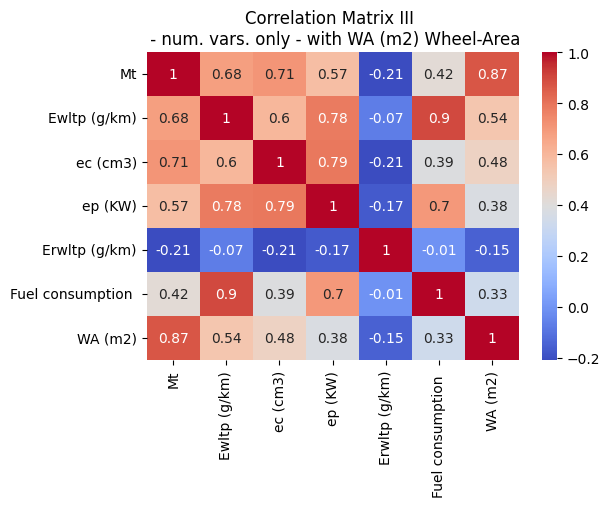

In [47]:
# create correlation matrix III
df_int_combustion_num_corr = round(df_int_combustion_num.corr(),2)

# draw heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_int_combustion_num_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix III \n - num. vars. only - with WA (m2) Wheel-Area")
plt.show();

In [48]:
display(df_int_combustion.shape)
display(df_int_combustion_num.shape)

# Check if the indices of both DataFrames are identical
print(df_int_combustion.index.equals(df_int_combustion_num.index))

# display(df_int_combustion.isna().sum())      #-> all columns: 0
# display(df_int_combustion_num.isna().sum())  #-> all columns: 0

(216628, 26)

(216628, 7)

True


In [49]:
#
# FALLBACK  (resetting the dataframe to num_vars only)
#
# create fallback
df_int_combustion_num_fallback = df_int_combustion_num.copy()
#
#

In [50]:
#############################################################################
#               FIRST   REGRESSION   MODELS                                 #
#############################################################################

In [51]:
# First simple linear regression model with
#
# only num. vars, using df_int_combustion_num -dataframe-
# without scaling the features

# import libs
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


In [52]:
# Simple linear regression model
#
# only num. vars, using df_int_combustion_num -dataframe-
# without scaling the features

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop("Ewltp (g/km)", axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test, y_test), 3))

# -> Potential Overfitting ?!?!
# Score (R²) of the model on the training sample: 0.926
# Score of cross validation - mean: 0.926
# Score (R²) of the model on the test sample: 0.928

Linear regression model coefficients:


,Estimated value
intercept,-4.348025
Mt,0.028229
ec (cm3),0.002879
ep (KW),0.040066
Erwltp (g/km),0.960326
Fuel consumption,15.439493
WA (m2),-0.644799



Score (R²) of the model on the training sample
0.926
Score of cross validation - mean
0.926
score (R²) of the model on the test sample
0.928


In [53]:
# Simple linear regression model
#
# only num. vars, using df_int_combustion_num -dataframe-
# scaling the features

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop("Ewltp (g/km)", axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train_scaled, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test_scaled, y_test), 3))

# -> Still potential overfitting ?!?!
# -> same score results as without scaling the features
# Score (R²) of the model on the training sample: 0.926
# Score of cross validation - mean: 0.926
# Score (R²) of the model on the test sample: 0.928

Linear regression model coefficients:


,Estimated value
intercept,142.153584
Mt,7.459932
ec (cm3),1.404303
ep (KW),1.884432
Erwltp (g/km),0.641849
Fuel consumption,16.993724
WA (m2),-0.217090



Score (R²) of the model on the training sample
0.926
Score of cross validation - mean
0.926
score (R²) of the model on the test sample
0.928


In [54]:
# Simple linear regression model
#
# num. vars, using df_int_combustion_num -dataframe-
# including Ft = fuel-type (cat) one-hot-encoded (after Train-Test-Split)
# scaling the features (after cat. encoding)
#

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) to the dataframe
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft"]]], axis= 1)
# display(df_int_combustion_num.isna().sum())

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop("Ewltp (g/km)", axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")

# align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X_train.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train_scaled, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test_scaled, y_test), 3))

# -> ... much too good fit ?!?
# -> better score results as w/wo scaling the features
# Score (R²) of the model on the training sample: 0.989
# Score of cross validation - mean: 0.989
# Score (R²) of the model on the test sample: 0.99
# -> As discussed todayin out project meeting:
# -> ( "Fuel consumption" (still feature) is the Target var. "Ewltp (g/km)
# -> with another dress!

Linear regression model coefficients:


,Estimated value
intercept,142.153584
Mt,1.517139
ec (cm3),-0.997733
ep (KW),0.159054
Erwltp (g/km),0.082364
Fuel consumption,25.410432
WA (m2),-0.115764
Ft_DIESEL,5.360240
Ft_E85,-1.948317
Ft_LPG,-4.508049



Score (R²) of the model on the training sample
0.989
Score of cross validation - mean
0.989
score (R²) of the model on the test sample
0.99


In [55]:
# Simple linear regression model
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
# including fuel-type (cat) one-hot-encoded (after Train-Test-Split)
# scaling the features (after cat. encoding)
#
# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) to the dataframe
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft"]]], axis=1)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")

# Align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X_train.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
print("Linear regression model coefficients:")
display(coef)
print()

# display the score (R²) of the model on the training sample.
print("Score (R²) of the model on the training sample")
print(round(lr.score(X_train_scaled, y_train), 3))

# display score of cross validation 10-fold  - mean
print("Score of cross validation - mean")
print(round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3))

# display the score (R²) of the model on the test sample.
print("score (R²) of the model on the test sample")
print(round(lr.score(X_test_scaled, y_test), 3))


# -> lower score results as w/wo scaling the features
# Score (R²) of the model on the training sample: 0.747
# Score of cross validation - mean: 0.747
# Score (R²) of the model on the test sample: 0.752

Linear regression model coefficients:


,Estimated value
intercept,142.153584
Mt,13.658901
ec (cm3),-5.829153
ep (KW),16.344291
Erwltp (g/km),2.138471
WA (m2),-0.051445
Ft_DIESEL,-2.198690
Ft_E85,1.270272
Ft_LPG,-0.456535
Ft_NG-BIOMETHANE,-0.236964



Score (R²) of the model on the training sample
0.747
Score of cross validation - mean
0.747
score (R²) of the model on the test sample
0.752


In [56]:
# Simple KNN regression model
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
# including fuel-type (cat) one-hot-encoded (after Train-Test-Split)
# scaling the features (after cat. encoding)
#
# import class
from sklearn import neighbors

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) to the dataframe
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft"]]], axis=1)
print("Dataset size: ", df_int_combustion_num.shape)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)
print("Target variable: ", y.name)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")
print("Explanatory variables: ", X_train.columns)

# align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instatiate model
knn = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 1, weights = "distance")

# train model
knn.fit(X_train_scaled, y_train)

# calc predictions
y_pred = knn.predict(X_test_scaled)

# create confusion matrix
# cm = pd.crosstab(y_test, y_pred, rownames=["Real Class"], colnames=["Predicted Class"])

# display confusion matrix, eaach unique Ewltp value is treated like a label
# display(cm)

# calc accuracy score
acc = knn.score(X_test_scaled, y_test)

# display accuracy score
print("Accuracy of the model on test-set: ", acc)
# knn = neighbors.KNeighborsClassifier(n_neighbors = n, p = 2)
# -> 0.37  (n=10)
# -> 0.38  (n=7)
# -> 0.39  (n=3)
# -> 0.40  (n=1)
# -> low accuracy

# acc:
# knn = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2, weights = "distance")
#  -> 0.41
# knn = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 2, weights = "distance")
#  -> 0.42
# knn = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 1, weights = "distance")
# -> 0.44
# -> took 75 sec

Dataset size:  (216628, 8)
Target variable:  Ewltp (g/km)
Explanatory variables:  Index(['Mt', 'ec (cm3)', 'ep (KW)', 'Erwltp (g/km)', 'WA (m2)', 'Ft_DIESEL',
       'Ft_E85', 'Ft_LPG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL'],
      dtype='object')
Accuracy of the model on test-set:  0.4417711468508226


In [57]:
# Simple Decission Tree regression model (classifier)
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
# including fuel-type (cat) one-hot-encoded (after Train-Test-Split)
# scaling the features (after cat. encoding)

# import class
from sklearn.tree import DecisionTreeClassifier

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) to the dataframe
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft"]]], axis=1)
print("Dataset size: ", df_int_combustion_num.shape)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
# print(y)
print("Target variable: ", y.name)

# create explanaory data: var X (pd dataframe)
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")
print("Explanatory variables: ", X_train.columns)

# align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create instance of dt_classifier
# dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 42)
dt_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 30, random_state = 42)

# train the classifier
dt_clf.fit(X_train_scaled, y_train)

# apply test-set to the model -> store predictions
y_pred = dt_clf.predict(X_test_scaled)

# create and display confusion matrix ( in case of having ~240 unique values of Ewltp!)
# cm = pd.crosstab(y_test, y_pred, rownames=["Real Class"], colnames=["Predicted Class"])

# calc accuracy score
acc = dt_clf.score(X_test_scaled, y_test)

# display accuracy score
print("Accuracy of the model on test-set: ", acc)

# importances, which features are how significant
dt_clf.feature_importances_    # will return a 1D-array wo the col_names: check idx

feats = {}
for feature, importance in zip(X_train.columns, dt_clf.feature_importances_):
    feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats,
                                         orient="index").rename(columns={0: "Importance"})

# Displaying the 8 most important variables
importances.sort_values(by="Importance", ascending=False).head(11)

# Accuracy ->
# dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 42)
# -> 0.06 (jesus we found nothing)
# dt_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state = 42)
# -> 0.06
# dt_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 10, random_state = 42)
# -> 0.22
# dt_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 50, random_state = 42)
# -> 0.46
# dt_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 30, random_state = 42)
# -> 0.46

# Classifications models will be put asisde and continue with linear regression

Dataset size:  (216628, 8)
Target variable:  Ewltp (g/km)
Explanatory variables:  Index(['Mt', 'ec (cm3)', 'ep (KW)', 'Erwltp (g/km)', 'WA (m2)', 'Ft_DIESEL',
       'Ft_E85', 'Ft_LPG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL'],
      dtype='object')
Accuracy of the model on test-set:  0.46287645179755155


,Importance
Mt,0.603733
Erwltp (g/km),0.148122
WA (m2),0.138134
ep (KW),0.058569
ec (cm3),0.041166
Ft_PETROL,0.005068
Ft_DIESEL,0.002827
Ft_E85,0.001798
Ft_LPG,0.000556
Ft_NG-BIOMETHANE,0.000026


Dataset size:  (216628, 9)
Target variable:  Ewltp (g/km)
Explanatory variables:  Index(['Mt', 'ec (cm3)', 'ep (KW)', 'Erwltp (g/km)', 'WA (m2)', 'Ft_DIESEL',
       'Ft_E85', 'Ft_LPG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL', 'Fm_B', 'Fm_F',
       'Fm_H', 'Fm_M'],
      dtype='object')


Score (R²) of the model on the training sample:  0.821
Score of cross validation - mean:  0.821
score (R²) of the model on the test sample:  0.824

RMSE on train-set:  10.28
RMSE on test-set:  10.27



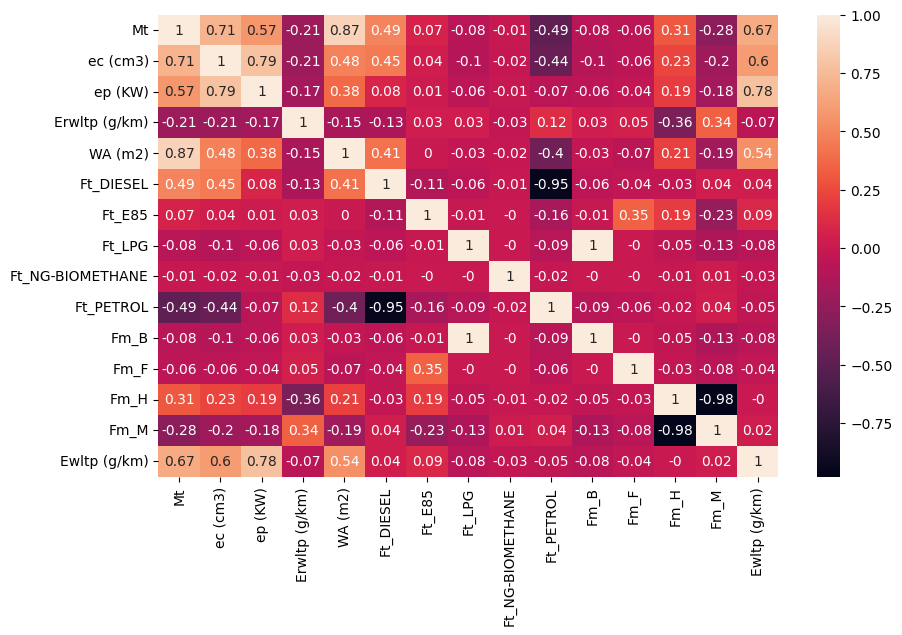

In [58]:
# Simple linear regression model
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
#  including fuel-type (cat) one-hot-encoded (after Train-Test-Split)
#  including fuel-mode (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)
#
# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) and "Fm" column (fuel mode) to the dataframe + Year
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft", "Fm"]]], axis=1)
print("Dataset size: ", df_int_combustion_num.shape)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
print("Target variable: ", y.name)

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")

# encode Fm (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Fm"], prefix = "Fm")
X_test = pd.get_dummies(X_test, columns = ["Fm"], prefix = "Fm")

print("Explanatory variables: ", X_train.columns)
print()

# Align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value = 0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X_train.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
# print("Linear regression model coefficients:")
# display(coef)
print()

# display the score (R²) of the model on the training sample.
score_train = round(lr.score(X_train_scaled, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 10-fold  - mean
score_cross_val = round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3)
print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(lr.score(X_test_scaled, y_test), 3)
print("score (R²) of the model on the test sample: ", score_test)
print()

# store the model pred. for X_train_scaled and X_test_scaled in the
# respective tables (pred_train) and (pred_test).
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

#-------------------------------------------------
# concatenate X_train, y_train
df_train = pd.concat([X_train, y_train], axis = 1)

# calc correlation
df_train_cor = round(df_train.corr(),2)

# display heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_train_cor, annot = True);
# -------------------------------------------------


# Score (R²) of the model on the training sample: 0.821
# Score of cross validation - mean: 0.821
# Score (R²) of the model on the test sample: 0.824

In [59]:
# Simple linear regression model
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
#  including fuel-type "Ft" (cat) one-hot-encoded (after Train-Test-Split)
#  including fuel-mode "Fm" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Make      "Mk" (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) and "Fm" column (fuel mode) to the dataframe + Year
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft", "Fm", "Mk"]]], axis = 1)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
print("Target variable: ", y.name)

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")

# encode Fm (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Fm"], prefix = "Fm")
X_test = pd.get_dummies(X_test, columns = ["Fm"], prefix = "Fm")

# encode Mk (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Mk"], prefix = "Mk")
X_test = pd.get_dummies(X_test, columns = ["Mk"], prefix = "Mk")
print("Explanatory variables: ", X_train.columns)
print()

# Align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# display(X_train_scaled)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X_train.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
# print("Linear regression model coefficients:")
# display(coef)
# print()

# display the score (R²) of the model on the training sample.
score_train = round(lr.score(X_train_scaled, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 10-fold  - mean
score_cross_val = round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3)
print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(lr.score(X_test_scaled, y_test), 3)
print("score (R²) of the model on the test sample: ", score_test)
print()

# store the model pred. for X_train_scaled and X_test_scaled in the
# respective tables (pred_train) and (pred_test).
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

#-------------------------------------------------
# # concatenate X_train, y_train
# df_train = pd.concat([X_train, y_train], axis = 1)

# # calc correlation
# df_train_cor = round(df_train.corr(),2)

# # display heatmap
# plt.figure(figsize=(22,18))
# sns.heatmap(df_train_cor, annot = False);
# -------------------------------------------------

# -> lower score results as w/wo scaling the features
# Score (R²) of the model on the training sample: 0.875
# Score of cross validation - mean: - 5.6 ?!?!?
# Score (R²) of the model on the test sample: 0.879
#
# RMSE on train-set:  8.58
# RMSE on test-set:   8.51


Target variable:  Ewltp (g/km)
Explanatory variables:  Index(['Mt', 'ec (cm3)', 'ep (KW)', 'Erwltp (g/km)', 'WA (m2)', 'Ft_DIESEL',
       'Ft_E85', 'Ft_LPG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL', 'Fm_B', 'Fm_F',
       'Fm_H', 'Fm_M', 'Mk_ALFA ROMEO', 'Mk_ALPINA', 'Mk_ALPINE',
       'Mk_ASTON MARTIN', 'Mk_AUDI', 'Mk_BENTLEY', 'Mk_BMW', 'Mk_BUGATTI',
       'Mk_CADILLAC', 'Mk_CASELANI', 'Mk_CATERHAM', 'Mk_CHEVROLET',
       'Mk_CITROEN', 'Mk_CUPRA', 'Mk_DACIA', 'Mk_DALLARA', 'Mk_DONKERVOORT',
       'Mk_DR', 'Mk_DS', 'Mk_FERRARI', 'Mk_FIAT', 'Mk_FORD',
       'Mk_FORD-CNG-TECHNIK', 'Mk_HONDA', 'Mk_HYUNDAI', 'Mk_INEOS',
       'Mk_JAGUAR', 'Mk_JEEP', 'Mk_KIA', 'Mk_KTM', 'Mk_LAMBORGHINI',
       'Mk_LAND ROVER', 'Mk_LEXUS', 'Mk_LOTUS', 'Mk_MASERATI', 'Mk_MAZDA',
       'Mk_MC LAREN', 'Mk_MERCEDES AMG', 'Mk_MERCEDES BENZ', 'Mk_MG',
       'Mk_MINI', 'Mk_MITSUBISHI', 'Mk_MORGAN', 'Mk_NISSAN', 'Mk_OPEL',
       'Mk_PEUGEOT', 'Mk_PORSCHE', 'Mk_RENAULT', 'Mk_ROLLS ROYCE', 'Mk_SEAT',
       'Mk_SE

In [60]:
# Simple linear regression model
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
#  including fuel-type "Ft" (cat) one-hot-encoded (after Train-Test-Split)
#  including fuel-mode "Fm" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Make      "Mk" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Ino.Tech. "IT" (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) and "Fm" column (fuel mode) to the dataframe + Year
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft", "Fm", "Mk", "IT"]]], axis = 1)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
print("Target variable: ", y.name)

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 42)

# encode Ft (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Ft"], prefix = "Ft")
X_test = pd.get_dummies(X_test, columns = ["Ft"], prefix = "Ft")

# encode Fm (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Fm"], prefix = "Fm")
X_test = pd.get_dummies(X_test, columns = ["Fm"], prefix = "Fm")

# encode Mk (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["Mk"], prefix = "Mk")
X_test = pd.get_dummies(X_test, columns = ["Mk"], prefix = "Mk")

# encode IT (cat.-var.) in X_train and X_test
X_train = pd.get_dummies(X_train, columns = ["IT"], prefix = "IT")
X_test = pd.get_dummies(X_test, columns = ["IT"], prefix = "IT")
print("Explanatory variables: ", X_train.columns)
print()

# Align columns in X_train and X_test (in case some categories are not present in test or train)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# create a scaler
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# display(X_train_scaled)

# create an instance of a lin. reg. modell
lr = LinearRegression()

# train/fit the model
lr.fit(X_train_scaled, y_train)

# display intercept and coeff (slope) together with the var/column involved -> in a df
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

features = list(X_train.columns)
features.insert(0, "intercept")

coef = pd.DataFrame({"Estimated value": coeffs}, index = features)
# print("Linear regression model coefficients:")
# display(coef)
# print()

# display the score (R²) of the model on the training sample.
score_train = round(lr.score(X_train_scaled, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 10-fold  - mean
score_cross_val = round(cross_val_score(lr, X_train_scaled, y_train, cv = 10).mean(), 3)
print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(lr.score(X_test_scaled, y_test), 3)
print("Score (R²) of the model on the test sample: ", score_test)
print()

# store the model pred. for X_train_scaled and X_test_scaled in the
# respective tables (pred_train) and (pred_test).
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

#-------------------------------------------------
# # concatenate X_train, y_train
# df_train = pd.concat([X_train, y_train], axis = 1)

# # calc correlation
# df_train_cor = round(df_train.corr(),2)

# # display heatmap
# plt.figure(figsize=(22,18))
# sns.heatmap(df_train_cor, annot = False);
# -------------------------------------------------

# Score (R²) of the model on the training sample: 0.913
# Score of cross validation - mean: - 1 ?!?!?
# Score (R²) of the model on the test sample: 0.915
# RMSE train-set: 7.17
# RMSE test-set: 1.13


Target variable:  Ewltp (g/km)
Explanatory variables:  Index(['Mt', 'ec (cm3)', 'ep (KW)', 'Erwltp (g/km)', 'WA (m2)', 'Ft_DIESEL',
       'Ft_E85', 'Ft_LPG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL',
       ...
       'IT_e9 28', 'IT_e9 28 29', 'IT_e9 29', 'IT_e9 29 37', 'IT_e9 32',
       'IT_e9 32 37', 'IT_e9 33', 'IT_e9 33 37', 'IT_e9 37', 'IT__none_'],
      dtype='object', length=150)

Score (R²) of the model on the training sample:  0.913
Score of cross validation - mean:  -1.0066914151174997e+24
Score (R²) of the model on the test sample:  0.915

RMSE on train-set:  7.17
RMSE on test-set:  7.13



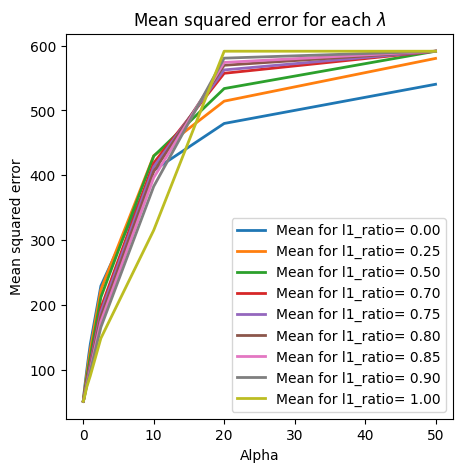

Optimal alpha:  0.001
Optimal l1_ratio:  1.0

Score (R²) of the model on the training sample:  0.913
Score (R²) of the model on the test sample:  0.915

RMSE on train-set:  7.17
RMSE on test-set:  7.13



In [61]:
# Elastic-Net     Linear regression model with penalty
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
#  including fuel-type "Ft" (cat) one-hot-encoded (after Train-Test-Split)
#  including fuel-mode "Fm" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Make      "Mk" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Make      "IT" (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)

# import the ElasticNetCV function from sklearn.linear_model.
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings("ignore")

# create an Elastic Net reg. model, with 8 fold cross-validation
para_l1ratio = (0.001, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 1)
para_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0, 2.5, 10, 20, 50)
model_en = ElasticNetCV(cv = 8, l1_ratio = para_l1ratio, alphas = para_alphas)

# tran/fit the model (reuse split from prevous model)
model_en.fit(X_train_scaled, y_train)

# display in a graph, for each value of l1_ratio,
# the curve representing the average of the MSE errors obtained by cross-validation
# as a function of the value of alpha
alphas = model_en.alphas_

plt.figure(figsize = (5,5))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
         label="Mean for l1_ratio= %.2f" %model_en.l1_ratio[i], linewidth=2)

plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean squared error")
plt.title("Mean squared error for each $\lambda$")
plt.show();

# store the model pred. for X_train and X_test in the respective tables (pred_train) and (pred_test).
pred_train = model_en.predict(X_train_scaled)
pred_test = model_en.predict(X_test_scaled)

# get best parameters
optimal_alpha = model_en.alpha_
optimal_l1_ratio = model_en.l1_ratio_

# print best parameters
print("Optimal alpha: ", optimal_alpha)
print("Optimal l1_ratio: ", optimal_l1_ratio)
print()

# display the score (R²) of the model on the training sample.
score_train = round(model_en.score(X_train_scaled, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 10-fold  - mean
# score_cross_val = round(cross_val_score(model_en, X_train_scaled, y_train, cv = 10).mean(), 3)
# print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(model_en.score(X_test_scaled, y_test), 3)
print("Score (R²) of the model on the test sample: ", score_test)
print()

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

# Plot shows only one minimum with alpha = 1 and l1-ratio towards 0
# Computation takes about 3 Minutes
# Score and RMSE do not increase compared to the lin-reg done before
#
# Optimal alpha:  0.0001
# Optimal l1_ratio:  1.0 (pure Ridge model ?)
# Score (R²) of the model on the training sample:  0.913
# Score (R²) of the model on the test sample:  0.915
# RMSE on train-set:  7.17
# RMSE on test-set:  7.13


In [62]:
# -----------  Optimise Model by selecting "relevant" Faetures  ---------------#

In [63]:
# Select-KBest :  Linear regression model
#
# select explanatory vars which have high F-Score AND p-val. < 0.05
#
# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
#  including fuel-type,  "Ft" (cat) one-hot-encoded (after Train-Test-Split)
#  including fuel-mode,  "Fm" (cat) one-hot-encoded (after Trian-Test-Split)
#  including make,       "Mk" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Ino. Tech., "IT" (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# import warnings
# warnings.filterwarnings("ignore")

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) and "Fm" column (fuel mode) to the dataframe + Year
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft", "Fm", "Mk", "IT"]]], axis = 1)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
print("Target variable: ", y.name)
print()

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# encode Ft, Fm, Mk, It (cat.-var.) in X (we are encoding this time befor train-test-split)
X = pd.get_dummies(X, columns = ["Ft", "Fm", "Mk", "IT"], prefix = ["Ft", "Fm", "Mk", "IT"])

# create selector (sk): score function = f_regression, number of features to be selekted (k) = "20"
# f_regression function measures the linear relationships between each predictor (feature)
# and the target variable by computing ANOVA F-values.
sk = SelectKBest(f_regression, k="all")

# adjust selector (sk) to objects X (target-variables) and y (target)
sk.fit(X = X, y = y)

# calc/get F-values and p-values for all features
#  The F-score measures the ratio of the variance explained by the model with the
#  feature to the variance within the residuals of the model. A higher F-score
#  indicates that the model with the feature explains a significant amount of
#  variance relative to a model without the feature.
f_scores = sk.scores_
p_values = sk.pvalues_

# display the names of the col. of X selected by the selector, using the get_support method
# print("Selected features:")
# display(X.columns[sk.get_support()])

# create a dataframe for the scores and p-values
features_scores = pd.DataFrame({ "Feature": X.columns,
                                 "F_score": f_scores,
                                 "P_value": p_values})

# add a p-val significance column
features_scores["P_val_sig"] = features_scores["P_value"] < 0.05

# count the amount of vars with significant p_values
pval_sig_count = features_scores["P_val_sig"].value_counts()
print("Amount of p-value significant explanatory variables: ", pval_sig_count)

# sort the features-scores dataframe by F_score
features_scores = features_scores.sort_values(by='F_score', ascending=False)

# display the TOP 20 features (out of 150)
display(features_scores.head(6))

#   Feature	         F_score	P_value	P_val_sig
# 2	  ep (KW)	       328778	  0.0	     True
# 0	  Mt	           181362	  0.0	     True
# 1	  ec (cm3)	     123790	  0.0	     True
# 4	  WA (m2)	       90643	  0.0	     True
# 45	Mk_LAND ROVER	 21490	  0.0	     True
# 60	Mk_PORSCHE	   20310	  0.0	     True
# 131	IT_e5 37 e9 32 11570	  0.0	     True
# 75	IT_e1 33	     7058	    0.0	     True
# -> WoaW Mk_Land Rover and Mk_Porsche explain "a lot"

#-----------------------------------------------------------
# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create again the/a selctor with the TOP 100 Features with a p < 0.05
sk = SelectKBest(f_regression, k = 150)

# adjust again selector (sk) to objects X_train and y_train
sk.fit(X = X_train, y = y_train)

# create the X_train_selec and X_test_selc arrays from X_train and X_test,
# using the transform method of the sk selector
X_train_selec = sk.transform(X_train)
X_test_selec = sk.transform(X_test)

# create scaler and fit it with X_train_selec
scaler = preprocessing.StandardScaler().fit(X_train_selec)

# apply the scaler to X_train and X_test, which will have only the selected "relevant" columns/vars
X_train_scaled = scaler.transform(X_train_selec)
X_test_scaled = scaler.transform(X_test_selec)

# create a linear regression model
lr_sk = LinearRegression()
lr_sk.fit(X_train_scaled, y_train)

# store the model pred. for X_train and X_test in the respective tables (pred_train) and (pred_test).
pred_train = lr_sk.predict(X_train_scaled)
pred_test = lr_sk.predict(X_test_scaled)

# display the score (R²) of the model on the training sample.
score_train = round(lr_sk.score(X_train_scaled, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 10-fold  - mean
# score_cross_val = round(cross_val_score(model_en, X_train_scaled, y_train, cv = 10).mean(), 3)
# print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(lr_sk.score(X_test_scaled, y_test), 3)
print("Score (R²) of the model on the test sample: ", score_test)
print()

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

# with k = 50
# Score (R²) of the model on the training sample:  0.832
# Score (R²) of the model on the test sample:  0.832
# RMSE on train-set:  10.04
# RMSE on test-set:  10.03
# with k = 75
# Score (R²) of the model on the training sample:  0.87
# Score (R²) of the model on the test sample:  0.87
# RMSE on train-set:  8.86
# RMSE on test-set:  8.78
# with k = 100
# Score (R²) of the model on the training sample:  0.91
# Score (R²) of the model on the test sample:  0.91
# RMSE on train-set:  7.35
# RMSE on test-set:  7.31
# with k = 132
# (all explanatory vars with p< 0.05)
# Score (R²) of the model on the training sample:  0.91
# Score (R²) of the model on the test sample:  0.92
# RMSE on train-set:  7.18
# RMSE on test-set:  7.15
# with k = 150
# (all explanatory vars)
# Score (R²) of the model on the training sample:  0.91
# Score (R²) of the model on the test sample:  0.92
# RMSE on train-set:  7.17
# RMSE on test-set:  7.13
#
# -> Interesting since the model can be reduced by 1/3 = 100
# explanatory vars to get the same scores/RMSE

Target variable:  Ewltp (g/km)

Amount of p-value significant explanatory variables:  P_val_sig
True     132
False     18
Name: count, dtype: int64


,Feature,F_score,P_value,P_val_sig
2,ep (KW),328778.911268,0.0,True
0,Mt,181362.818456,0.0,True
1,ec (cm3),123790.088668,0.0,True
4,WA (m2),90643.446935,0.0,True
45,Mk_LAND ROVER,21490.296244,0.0,True
60,Mk_PORSCHE,20310.392560,0.0,True


Score (R²) of the model on the training sample:  0.913
Score (R²) of the model on the test sample:  0.915

RMSE on train-set:  7.17
RMSE on test-set:  7.13



In [64]:
# Select_FromModel : linear regression model
#
# select explanatory variables / features with the most weight in the prediction

# droping "Fuel consumption " as "explanotry var"
# num. vars, using df_int_combustion_num -dataframe-
#  including fuel-type,  "Ft" (cat) one-hot-encoded (after Train-Test-Split)
#  including fuel-mode,  "Fm" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Make,       "Mk" (cat) one-hot-encoded (after Trian-Test-Split)
#  including Ino. Tech., "IT" (cat) one-hot-encoded (after Trian-Test-Split)
# scaling the features (after cat. encoding)

# import class SelectFromModel
from sklearn.feature_selection import SelectFromModel
# import warnings
# warnings.filterwarnings("ignore")

# start clean
df_int_combustion_num = df_int_combustion_num_fallback.copy()

# concatenate "Ft" column (fuel type) and "Fm" column (fuel mode) to the dataframe + Year
df_int_combustion_num  = pd.concat([df_int_combustion_num, df_int_combustion[["Ft", "Fm", "Mk", "IT"]]], axis = 1)

# create target data: var y (pd series)
y = df_int_combustion_num["Ewltp (g/km)"]
print("Target variable: ", y.name)
print()

# create explanaory data: var X (pd dataframe) droping also fuel consumption
X = df_int_combustion_num.drop(["Ewltp (g/km)", "Fuel consumption "], axis = 1)

# encode Ft, Fm, Mk, It (cat.-var.) in X (we are encoding this time befor train-test-split)
X = pd.get_dummies(X, columns = ["Ft", "Fm", "Mk", "IT"], prefix = ["Ft", "Fm", "Mk", "IT"])

# split the data into training, testing sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create scaler and fit it with X_train_selec
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the scaler to X_train and X_test, which will have only the selected "relevant" columns/vars
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create instance of a linear regression model (lr).
lr = LinearRegression()

# create an sfm selector instance of the SelectFromModel class, from the created lr model
sfm = SelectFromModel(lr, threshold= "median")

# train/fit SelectFromModel to the training data and select important features
# apply the same feature selection to the test data to ensure consistency
sfm_train = sfm.fit_transform(X_train_scaled, y_train)
sfm_test = sfm.transform(X_test_scaled)

# display the names of the columns selected by sfm, using the get_support method
print("Selcted columns by the selector:")
selected_mask = sfm.get_support()
selected_features = X_train.columns[selected_mask]
print(selected_features)


# create a model from the selected variables and display the model score on the
# training and test sets.
sfm_lr = LinearRegression()
sfm_lr.fit(sfm_train, y_train)

# store the model pred. for X_train and X_test in the respective tables (pred_train) and (pred_test).
pred_train = sfm_lr.predict(sfm_train)
pred_test = sfm_lr.predict(sfm_test)

# display the score (R²) of the model on the training sample.
score_train = round(sfm_lr.score(sfm_train, y_train), 3)
print("Score (R²) of the model on the training sample: ", score_train)

# display score of cross validation 10-fold  - mean
# score_cross_val = round(cross_val_score(sfm_lr, sfm_train, y_train, cv = 10).mean(), 3)
# print("Score of cross validation - mean: ", score_cross_val)

# display the score (R²) of the model on the test sample.
score_test = round(sfm_lr.score(sfm_test, y_test), 3)
print("Score (R²) of the model on the test sample: ", score_test)
print()

# display the roots of the mean square errors RMSE for both samples.
rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
rmse_test =  round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
print("RMSE on train-set: ", rmse_train)
print("RMSE on test-set: ", rmse_test)
print()

# ????
# Why were this features selected... Ft.., Fm.., Mk... ???
# there must be bug somwhere... hmmmm...
# Score (R²) of the model on the training sample:  0.347
# Score (R²) of the model on the test sample:  0.347
# RMSE on train-set:  19.64
# RMSE on test-set:  19.78
# Works not as good as Select KBest....

Target variable:  Ewltp (g/km)

Selcted columns by the selector:
Index(['Ft_DIESEL', 'Ft_LPG', 'Ft_PETROL', 'Fm_B', 'Fm_H', 'Fm_M', 'Mk_AUDI',
       'Mk_BMW', 'Mk_INEOS', 'Mk_KTM', 'Mk_MERCEDES BENZ', 'Mk_PEUGEOT',
       'Mk_RENAULT', 'Mk_SKODA', 'Mk_VOLKSWAGEN', 'IT_e1 28 29', 'IT_e1 29',
       'IT_e1 29 37', 'IT_e1 33', 'IT_e13 28', 'IT_e13 28 29', 'IT_e13 29',
       'IT_e13 29 37', 'IT_e13 32 37', 'IT_e13 33', 'IT_e13 33 37',
       'IT_e13 37', 'IT_e19 29 37', 'IT_e2 28', 'IT_e2 28 29', 'IT_e2 28 33',
       'IT_e2 29', 'IT_e2 29 37', 'IT_e2 33', 'IT_e2 33 37', 'IT_e2 37',
       'IT_e24 28', 'IT_e24 28 29', 'IT_e24 29', 'IT_e24 29 37', 'IT_e24 32',
       'IT_e24 32 37', 'IT_e24 37', 'IT_e3 28 29', 'IT_e3 28 32 37',
       'IT_e3 29', 'IT_e3 29 37', 'IT_e3 32', 'IT_e3 32 37', 'IT_e3 33',
       'IT_e4 28', 'IT_e4 32 37', 'IT_e4 37', 'IT_e4 37 e5 32', 'IT_e5 28',
       'IT_e5 28 e9 32', 'IT_e5 29', 'IT_e5 32', 'IT_e5 32 37',
       'IT_e5 37 e9 32', 'IT_e6 28', 'IT_e6 37', 'IT